### Instructions:

    1. Submit your python notebooks in zip format with naming convention as:
        
            RollNo1_RollNo2_RollNo3.zip
            
    2. Cheating of any form will not be tolerated.
    

Fill your Team details here.<br>
<br>
Format: Roll Number 
 
         1.MT2018026
         2.MT2018090
         3.MT2018116

### Question1: Implement Multivariate Linear Regression from scratch. <br>

#### Instructions for each cell are provided along with the marks they hold. Fill in the cells with your code

Import necessary packages.

In [41]:
# Import packages

# 1 Mark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Set the seed value to 40.

In [42]:
# Set seed value

# 1 Mark
np.random.seed(40)

Before building a linear regression model, we need to generate data. <br>
<br>
Generate data according to <br>
<br>
Y = 5*X1 + 6*X2 + 7*X3 + c + delta 

Generate 100 samples of data.

In [43]:
# Generate data
x1 = np.random.rand(100)

x2 = np.random.rand(100)

x3 = np.random.rand(100)

# constant term
c = 10

# delta is noise
delta = np.random.rand(100)

y = 5*x1 + 6*x2 + 7*x3 + delta + c

# 3 marks

Create an array X which is combination of x1, x2, x3. <br>
Remember the shape of X should be (100, 3)

In [44]:
# Create X as mentioned above
X =[]
for i in range(0,100):
    X.append([x1[i],x2[i],x3[i]])
X = np.array(X)
print(X.shape)

# 1 Mark

(100, 3)


Change the shape of y to (100, 1) to match dimensions.

In [45]:
# Change the shape of y
#print (y)
y = y.reshape(-1, 1)

# 1 Mark

You need to change X to [1, x1, x2, x3] as sir mentioned in the class to get rid of delta term in our equation.

    1. Create variable ones with all ones of shape (100, 1).
    2. Concatenate it to X.

In [46]:
# Create a varibales ones and X.
ones = np.ones(100)
ones = ones.reshape(-1, 1)


X.shape
#ones.shape
# 2 Marks
#X.shape


(100, 3)

In [47]:
X = np.hstack([ones, X])

In [48]:
X[0]

array([1.        , 0.40768703, 0.71076876, 0.00964108])

Create the indices for training, validation and testing

In [49]:
# Get indices of samples for training, validation and testing
indices = np.random.permutation(X.shape[0])
training_idx, val_idx, test_idx = indices[:60], indices[20:80], indices[80:100]
# 2 Marks

Split data into:
    1. Training data. (X_train, y_train)
    2. Validation data. (X_val, y_val)
    3. Testing data. (X_test, y_test)

In [50]:
# Split x into training and testing data
x_train = X[training_idx]
x_val = X[val_idx]
x_test = X[test_idx]

# Split y into training and testing data
y_train = y[training_idx]
y_val = y[val_idx]
y_test = y[test_idx]

# 2 Marks

Define Initialize function to initialize weight matrix.

    Input: shape of the matrix.
    Output: weight matrix.

In [51]:
def Initialize(shape):                             # Expecting the input shape as (100,x) so we need to genrate x-1 weights
    w =[]                                        # since first 1 is constant
    for i in range(shape[1]):
        w.append(float(np.random.rand(1)))
    
    w = np.array(w)
    print(w)
    return w
    ##Write your code here.
    
# 3 Marks

Define loss function which is RMSE. 

    Input: X, y, theta (weight matrix).
    Output: loss.

In [52]:
# Loss function
def loss(X,y,w):
    sum  = 0
    for i in range (0,X.shape[0]):
        sum = sum + np.square(y[i] - (w[0]*X[i][0]+w[1]*X[i][1]+w[2]*X[i][2]+w[3]*X[i][3]))
        
    return np.sqrt(sum/X.shape[0])

    ##Write your code here.
    
# 3 Marks

Define get_grad function to get gradients of loss function with respect to weight matrix.

    Input: X, y, theta (weight matrix).
    Ouput: gradients with respect to theta (weight matrix).

In [53]:
def get_grad(X, y, w):
    w0_grad = []
    w1_grad = []
    w2_grad = []
    w3_grad = []
#     print("w before")
#     print(w)
#     print("w1_grad before")
#     print(w1_grad)
    for i in range (0,X.shape[0]):
        w0_grad.append(((y[i] - (w[0]*X[i][0]+w[1]*X[i][1]+w[2]*X[i][2]+w[3]*X[i][3]))*(-X[i][0])))
        w1_grad.append(((y[i] - (w[0]*X[i][0]+w[1]*X[i][1]+w[2]*X[i][2]+w[3]*X[i][3]))*(-X[i][1])))
        w2_grad.append(((y[i] - (w[0]*X[i][0]+w[1]*X[i][1]+w[2]*X[i][2]+w[3]*X[i][3]))*(-X[i][2])))
        w3_grad.append(((y[i] - (w[0]*X[i][0]+w[1]*X[i][1]+w[2]*X[i][2]+w[3]*X[i][3]))*(-X[i][3])))
    w0 = np.mean(w1_grad)
    w1 = np.mean(w1_grad)
    w2 = np.mean(w2_grad)
    w3 = np.mean(w3_grad)
#     print("w after")
#     print(w)
#     print("w1_grad after")
#     print(w1_grad)
    w = np.array([w0, w1, w2 , w3])
    return  w
    ##Write your code here.
    
# 5 Marks

Initialize weight matrix using Initialize function defined above.

In [54]:
# Initialize theta with necessary shape
theta = Initialize(X.shape)
theta

# 1 Mark

[0.57451855 0.12969023 0.31063292 0.03614213]


array([0.57451855, 0.12969023, 0.31063292, 0.03614213])

Set following hyperparameters. 

    1. alpha (learning_rate) to 0.01 
    2. NoOfEpochs (no of epochs) to 1000

In [55]:
# Set hyper parameters
alpha = 0.01
NoOfEpochs =  1000

# 1 Mark

Create following variables with zeros to store training and validation loss. <br>
    1. loss_train (variable for training loss)
    2. loss_val (variable for validation loss

In [56]:
# Create loss_train and loss_val
loss_train = 0
loss_val =  0

# 2 Marks

It's time to update weight matrix using above defined functions. Store training and validation loss in loss_train and loss_val.

In [57]:
loss_val_vec = []; loss_train_vec = []


for i in range(NoOfEpochs):
    
    w_grad = get_grad(x_train, y_train, theta)
    theta[0] = theta[0] - alpha * w_grad[0]
    theta[1] = theta[1] - alpha * w_grad[1]
    theta[2] = theta[2] - alpha * w_grad[2]
    theta[3] = theta[3] - alpha * w_grad[2]
        
    loss_train = loss(x_train, y_train, theta)
    loss_val = loss(x_val , y_val ,theta) 
    # Update theta by using alpha and get_grad function
     
    # Append loss on training set to loss_train
    loss_val_vec.append(loss_val)
    loss_train_vec.append(loss_train)
    
    # Append loss on validation set to loss_val
    
# 5 Marks

Visualize traning and validation loss with number of iterations.

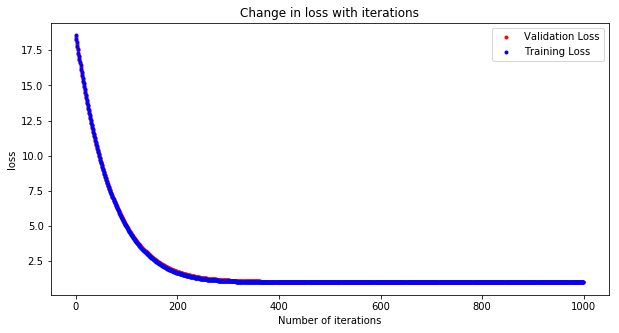

In [58]:
# Visualize loss with number of iterations
plt.figure(figsize=(10,5))
plt.plot(loss_val_vec, "r.", label = "Validation Loss")
plt.plot(loss_train_vec, "b.", label = "Training Loss")
plt.title('Change in loss with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("loss")
plt.legend(); plt.show()
# 5 Marks

Check the values of theta.

In [59]:
theta

array([7.64749453, 7.20266621, 7.98111275, 7.70662197])

Print loss on training, validation and testing data.

In [60]:
loss_test = loss(x_test, y_test, theta)
print("Loss on training data is: ",  loss_train)
print("Loss on validation data is: ", loss_val)
print("Loss on test data is: ", loss_test)
# 2 Mark`

Loss on training data is:  [1.00479578]
Loss on validation data is:  [1.033317]
Loss on test data is:  [1.09342049]
